In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("processed.cleveland.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Data Exploration

In [9]:
data.shape

(303, 14)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 30.8+ KB


In [12]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

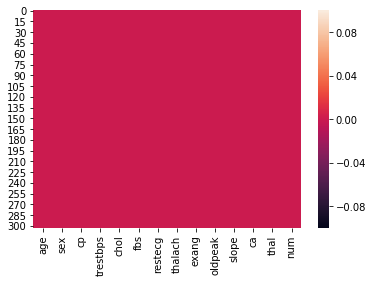

In [14]:
sns.heatmap(data.isnull())

There is no missing value in this data.

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


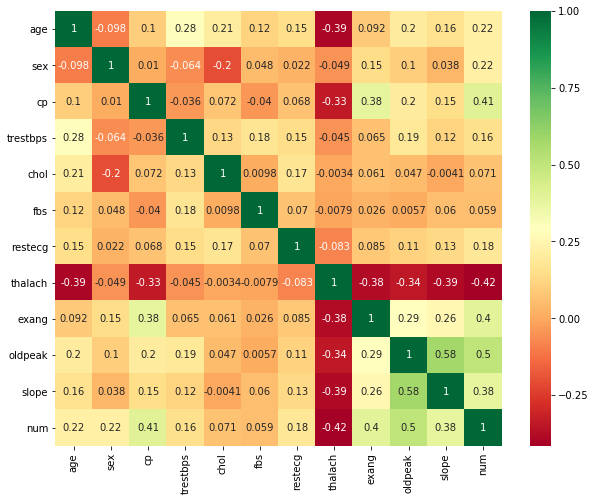

In [27]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F9747D0>,
      dtype=object)

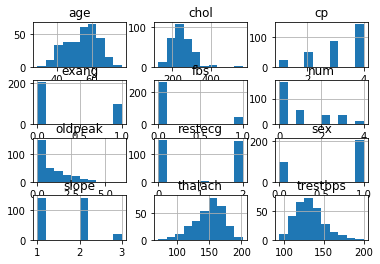

In [22]:
data.hist()

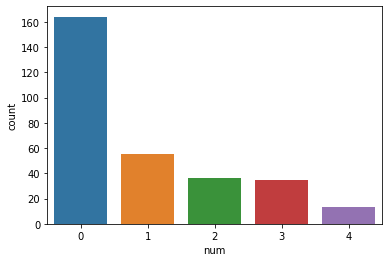

In [29]:
sns.countplot(x='num',data=data)

# Data Processing

After the observation of the dataset,i found that there are many attributes present in the datasets are in categorical form so ,we need to convert these data types into numerical value.  

In [34]:
data.dtypes,data.columns

(age         float64
 sex         float64
 cp          float64
 trestbps    float64
 chol        float64
 fbs         float64
 restecg     float64
 thalach     float64
 exang       float64
 oldpeak     float64
 slope       float64
 ca           object
 thal         object
 num           int64
 dtype: object,
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
       dtype='object'))

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
data['ca']=le.fit_transform(data['ca'])
data['thal']=le.fit_transform(data['thal'])

In [37]:
#cross-check
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int32
thal          int32
num           int64
dtype: object

In [38]:
#chcking outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[0.94872647, 0.68620244, 2.25177456, ..., 0.71312935, 0.15331686,
        0.76419779],
       [1.39200191, 0.68620244, 0.87798549, ..., 2.27412678, 0.87901666,
        0.86644961],
       [1.39200191, 0.68620244, 0.87798549, ..., 1.27837473, 1.18565038,
        0.05112591],
       ...,
       [0.28381332, 0.68620244, 0.87798549, ..., 0.28262269, 1.18565038,
        1.68177331],
       [0.28381332, 1.4572959 , 1.20852121, ..., 0.28262269, 0.87901666,
        0.05112591],
       [1.82174501, 0.68620244, 0.16526786, ..., 3.26987882, 0.87901666,
        0.76419779]])

In [39]:
threshold=3
print(np.where(z>3))
df=data[(z<3).all(axis=1)]
df

(array([ 48,  91, 121, 123, 126, 152, 166, 181, 188, 192, 245, 287, 302],
      dtype=int32), array([ 4,  9,  4,  9,  3,  4, 11,  4,  3, 11,  7, 11, 11], dtype=int32))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2,0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0,0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1,2,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0,2,1


In [40]:
data.shape,df.shape

((303, 14), (290, 14))

In [44]:
#Creating anew column called 'target'
#it contain 0 and 1
#0-->Healthy
#1-->Sick
#this will be splitting in this way
#0-->Healthy
#1,2,3,4-->Sick
target=[]
for i in df['num']:
    if i ==0:
        target.append('0')
    elif i>=1 and i<=4:
        target.append('1')

In [46]:
df['target']=target

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0,0


In [48]:
x=df.drop('target',axis=1)
y=df['target']

In [49]:
x.shape,y.shape

((290, 14), (290,))

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [51]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 14)
(64, 14)
(226,)
(64,)


In [54]:
#Implementation of ml models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [55]:
models=[lg,knn,dtc,gnb,rfc]

In [59]:
# Dictionary of pipelines and classifier types for ease of reference
model_dict = {0: 'Logistic Regression', 1: 'KNeighbors', 2: 'DecisionTreeClassifier',3:'GaussianNB',4:'RandomForestClassifier'}

# Fit the pipelines
for i in models:
	i.fit(x_train, y_train)

In [60]:
for i,model in enumerate(models):
    print("{} Test Accuracy: {}".format(model_dict[i],model.score(x_test,y_test)*100))

Logistic Regression Test Accuracy: 100.0
KNeighbors Test Accuracy: 78.125
DecisionTreeClassifier Test Accuracy: 100.0
GaussianNB Test Accuracy: 100.0
RandomForestClassifier Test Accuracy: 100.0


In [63]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

100.0
[[33  0]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        31

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



Here ,we can see almost all the machine learning models are performing well except knn so i am going to try to increase the accuracy of knn model. 

# Cross validation

In [66]:
from sklearn.model_selection import cross_val_score
scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    scores.append(score.mean())

In [67]:
score.mean()

0.8861822660098522

After the application of cross validation in knn model , i also got the accuracy of 88.61%.

In [72]:
from sklearn.externals import joblib
#saving the model as pickl
joblib.dump(knn,"Project 40_heart disease.pkl")

['Project 40_heart disease.pkl']

In [73]:
x= joblib.load('Project 40_heart disease.pkl')

In [74]:
x.predict(x_test)

array(['0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0',
       '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0'],
      dtype=object)